In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [85]:
from google.colab import drive

drive.mount('/content/gdrive')
data = np.flipud(pd.read_csv('gdrive/My Drive/6547_history.csv',usecols=[4]).values.astype('float32'))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [86]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [87]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [88]:
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(595, 1, 20)
(134, 1, 20)


In [89]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(1, look_back)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 50)             14200     
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 74,851
Trainable params: 74,851
Non-trainable params: 0
__________________________________________________

In [90]:
model.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
19/19 [==============================] - 7s 8ms/step - loss: 0.0065
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 6.2446e-04
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 3.1717e-04
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 2.4021e-04
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 2.4526e-04
Epoch 8/100
19/19 [==============================] - 0s 8ms/step - loss: 2.6204e-04
Epoch 9/100
19/19 [==============================] - 0s 8ms/step - loss: 2.5463e-04
Epoch 10/100
19/19 [==============================] - 0s 8ms/step - loss: 2.5699e-04
Epoch 11/100
19/19 [==============================] - 0s 8ms/step - loss: 2.1789e-04
Epoch 12/100
19/19 [==============================] - 0s 8ms/step - loss: 2.4573e-04
E

In [91]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [92]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [93]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

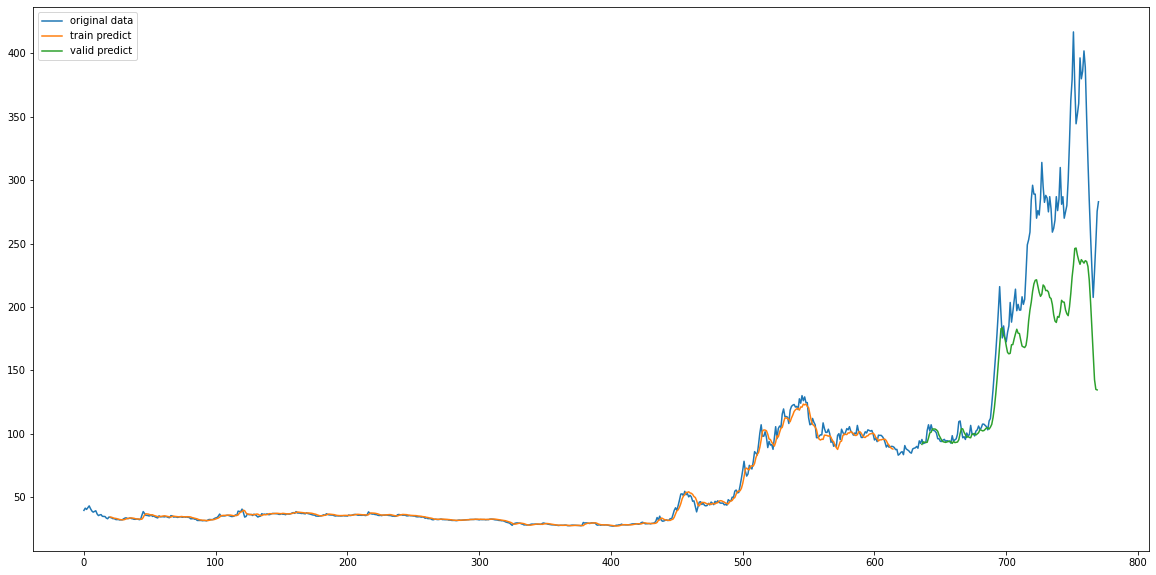

In [99]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(data),label="original data")
plt.plot(trainPredictPlot,label="train predict")
plt.plot(testPredictPlot,label="valid predict")
plt.legend()
plt.show()